In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import xarray as xr
import pandas as pd
import tqdm as tqd
import nctoolkit as nc

# ds = nc.open_thredds('http://tds.maracoos.org/thredds/dodsC/AVHRR/2021/1Agg')
# ds = nc.open_thredds('http://basin.ceoe.udel.edu/thredds/dodsC/avhrr_unfiltered_sst.nc')

nctoolkit is using Climate Data Operators version 2.2.0


In [2]:
ds = nc.open_thredds('http://tds.maracoos.org/thredds/dodsC/AVHRR/2019/1Agg')

In [3]:
ds



<nctoolkit.DataSet>:
Number of files: 1
File contents:
  variable  ntimes   npoints  nlevels                             long_name     unit data_type  fill_value
0    mcsst    2903  16474500        1  Multichannel Sea Surface Temperature  Celsius       F32      -999.0

In [4]:
xr_ds = ds.to_xarray()

In [5]:
xr_ds

<xarray.Dataset>
Dimensions:  (lon: 4500, lat: 3661, time: 2903)
Coordinates:
  * lon      (lon) float64 -100.0 -99.99 -99.98 -99.97 ... -50.02 -50.01 -50.0
  * lat      (lat) float64 20.0 20.01 20.02 20.03 ... 51.98 51.99 51.99 52.0
  * time     (time) datetime64[ns] 2019-01-01T00:57:00 ... 2019-12-31T22:09:00
Data variables:
    mcsst    (time, lat, lon) float32 ...
Attributes: (12/22)
    url:                       http://www.ceoe.udel.edu, http://marine.rutger...
    groundstation:             RU-COOL L-band receiver at Rutgers University,...
    creator_name:              Matt Oliver
    creator_email:             moliver@udel.edu
    institution:               University of Delaware
    source:                    NOAA AVHRR
    ...                        ...
    publisher_url:             http://maracoos.org
    Conventions:               ACDD-1.3, CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    NCO:                       4.0.8
    composite_members:          20191231.2031 20191231.2031 20191231.2031 201...
    license:                   Freely Distributed

In [8]:
a = xr_ds.isel(time=1500)

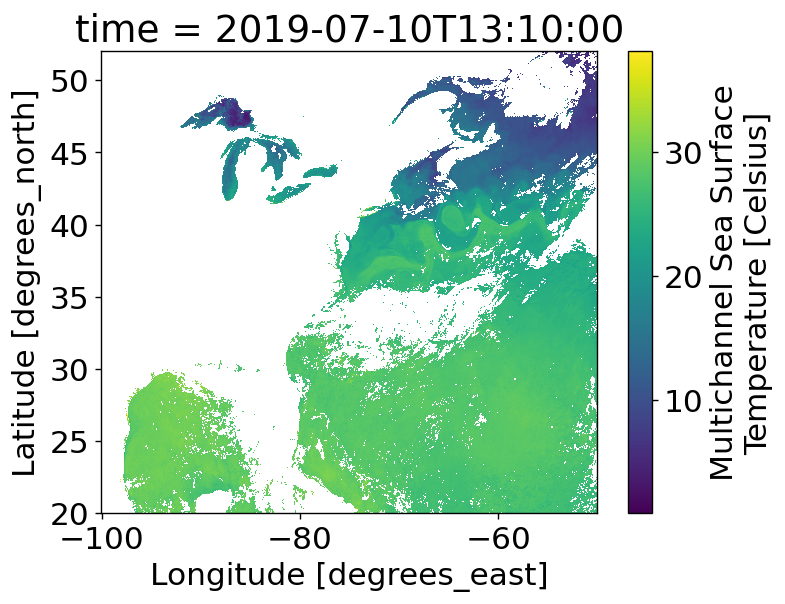

In [9]:
a.mcsst.plot()

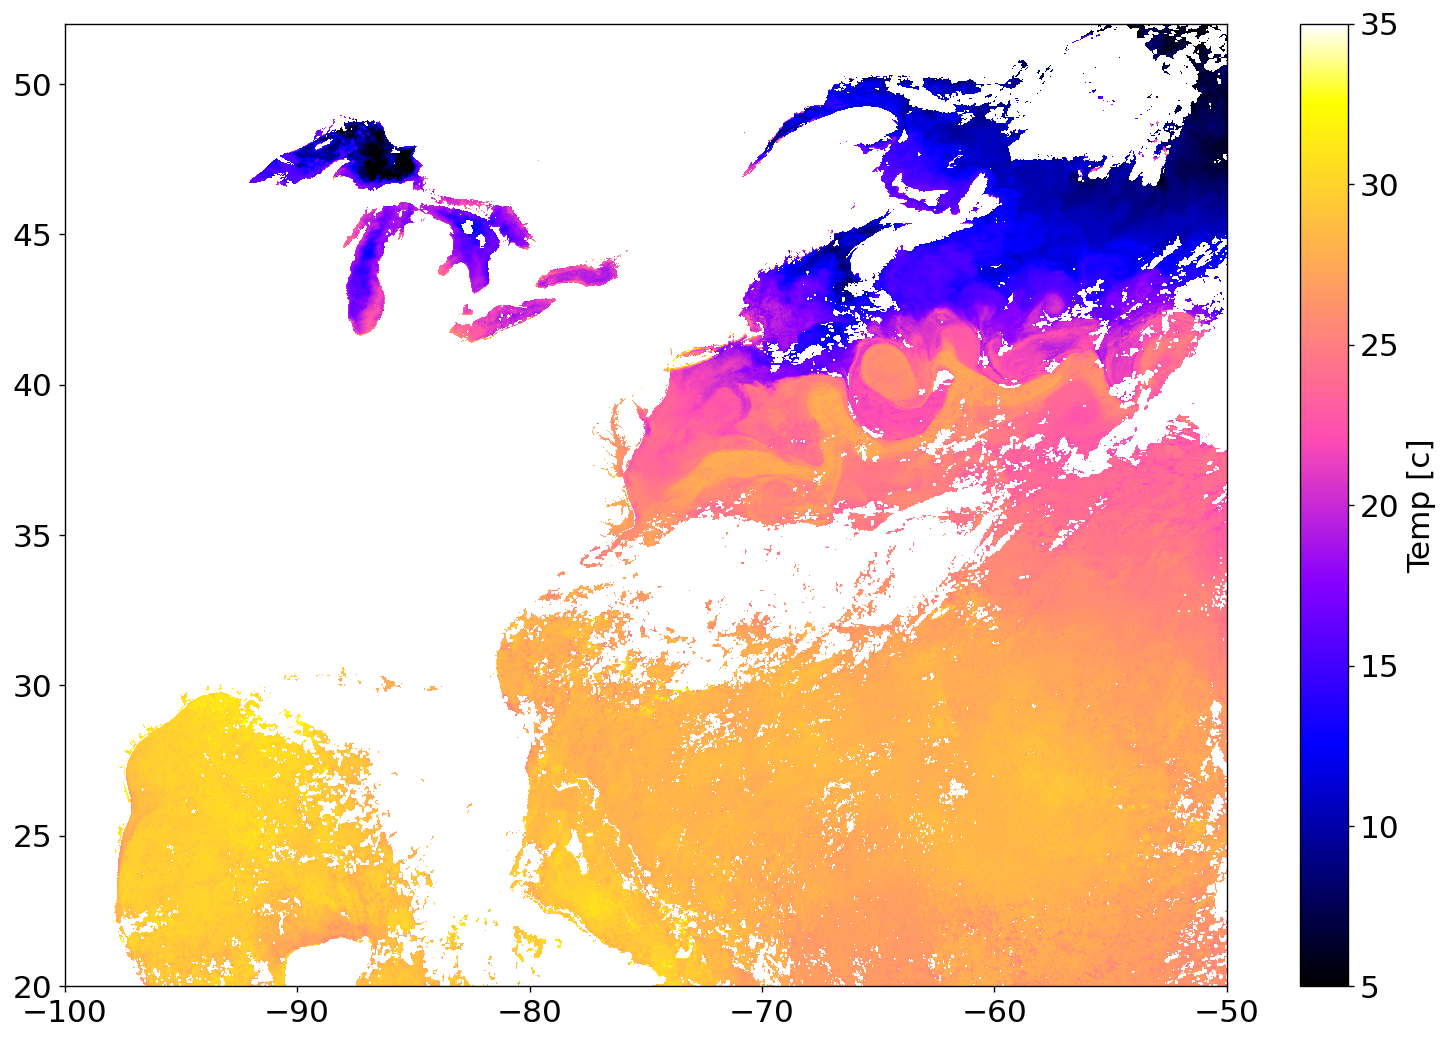

In [18]:
d = a.mcsst.values.copy()
lat = a.lat.values.copy()
lon = a.lon.values.copy()
plt.figure(figsize=(15,10))
plt.pcolormesh(lon, lat,d, cmap='gnuplot2')
plt.clim(5,35)
plt.colorbar(label='Temp [c]')
plt.show()

In [12]:
d = a.mcsst.values.copy()

In [16]:
a.lat

<xarray.DataArray 'lat' (lat: 3661)>
array([20.      , 20.010434, 20.020868, ..., 51.986333, 51.993166, 52.      ])
Coordinates:
  * lat      (lat) float64 20.0 20.01 20.02 20.03 ... 51.98 51.99 51.99 52.0
    time     datetime64[ns] 2019-07-10T13:10:00
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude
    _ChunkSizes:    3661